In \[8\]:

    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    import warnings
    warnings.filterwarnings("ignore", category=FutureWarning)
    sns.set_style("darkgrid")
    %matplotlib inline

In \[10\]:

    Data=pd.read_csv('C:/Users/ok/Downloads/archive/weatherAUS.csv')
    Data.head()

Out\[10\]:

|     | Date       | Location | MinTemp | MaxTemp | Rainfall | Evaporation | Sunshine | WindGustDir | WindGustSpeed | WindDir9am | ... | Humidity9am | Humidity3pm | Pressure9am | Pressure3pm | Cloud9am | Cloud3pm | Temp9am | Temp3pm | RainToday | RainTomorrow |
|-----|------------|----------|---------|---------|----------|-------------|----------|-------------|---------------|------------|-----|-------------|-------------|-------------|-------------|----------|----------|---------|---------|-----------|--------------|
| 0   | 2008-12-01 | Albury   | 13.4    | 22.9    | 0.6      | NaN         | NaN      | W           | 44.0          | W          | ... | 71.0        | 22.0        | 1007.7      | 1007.1      | 8.0      | NaN      | 16.9    | 21.8    | No        | No           |
| 1   | 2008-12-02 | Albury   | 7.4     | 25.1    | 0.0      | NaN         | NaN      | WNW         | 44.0          | NNW        | ... | 44.0        | 25.0        | 1010.6      | 1007.8      | NaN      | NaN      | 17.2    | 24.3    | No        | No           |
| 2   | 2008-12-03 | Albury   | 12.9    | 25.7    | 0.0      | NaN         | NaN      | WSW         | 46.0          | W          | ... | 38.0        | 30.0        | 1007.6      | 1008.7      | NaN      | 2.0      | 21.0    | 23.2    | No        | No           |
| 3   | 2008-12-04 | Albury   | 9.2     | 28.0    | 0.0      | NaN         | NaN      | NE          | 24.0          | SE         | ... | 45.0        | 16.0        | 1017.6      | 1012.8      | NaN      | NaN      | 18.1    | 26.5    | No        | No           |
| 4   | 2008-12-05 | Albury   | 17.5    | 32.3    | 1.0      | NaN         | NaN      | W           | 41.0          | ENE        | ... | 82.0        | 33.0        | 1010.8      | 1006.0      | 7.0      | 8.0      | 17.8    | 29.7    | No        | No           |

5 rows × 23 columns

In \[11\]:

    df=Data.copy()
    print(df.dtypes) 

    Date              object
    Location          object
    MinTemp          float64
    MaxTemp          float64
    Rainfall         float64
    Evaporation      float64
    Sunshine         float64
    WindGustDir       object
    WindGustSpeed    float64
    WindDir9am        object
    WindDir3pm        object
    WindSpeed9am     float64
    WindSpeed3pm     float64
    Humidity9am      float64
    Humidity3pm      float64
    Pressure9am      float64
    Pressure3pm      float64
    Cloud9am         float64
    Cloud3pm         float64
    Temp9am          float64
    Temp3pm          float64
    RainToday         object
    RainTomorrow      object
    dtype: object

In \[12\]:

    print("Data_shape:{}".format(df.shape))

    Data_shape:(145460, 23)

In \[13\]:

    plt.figure()
    sns.heatmap(df.isnull(),cbar=False,yticklabels=False)

Out\[13\]:

    <AxesSubplot:>

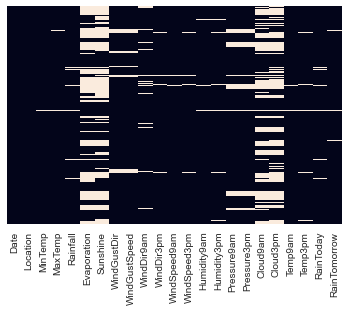

In \[14\]:

    nan_features=[col for col in df.columns if df[col].isnull().any()]
    print("features contain nan_values:{}".format(nan_features))

    features contain nan_values:['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow']

In \[15\]:

    df[nan_features].isnull().mean()

Out\[15\]:

    MinTemp          0.010209
    MaxTemp          0.008669
    Rainfall         0.022419
    Evaporation      0.431665
    Sunshine         0.480098
    WindGustDir      0.070989
    WindGustSpeed    0.070555
    WindDir9am       0.072639
    WindDir3pm       0.029066
    WindSpeed9am     0.012148
    WindSpeed3pm     0.021050
    Humidity9am      0.018246
    Humidity3pm      0.030984
    Pressure9am      0.103568
    Pressure3pm      0.103314
    Cloud9am         0.384216
    Cloud3pm         0.408071
    Temp9am          0.012148
    Temp3pm          0.024811
    RainToday        0.022419
    RainTomorrow     0.022460
    dtype: float64

In \[16\]:

    df.describe()

Out\[16\]:

|       | MinTemp       | MaxTemp       | Rainfall      | Evaporation  | Sunshine     | WindGustSpeed | WindSpeed9am  | WindSpeed3pm  | Humidity9am   | Humidity3pm   | Pressure9am  | Pressure3pm   | Cloud9am     | Cloud3pm     | Temp9am       | Temp3pm      |
|-------|---------------|---------------|---------------|--------------|--------------|---------------|---------------|---------------|---------------|---------------|--------------|---------------|--------------|--------------|---------------|--------------|
| count | 143975.000000 | 144199.000000 | 142199.000000 | 82670.000000 | 75625.000000 | 135197.000000 | 143693.000000 | 142398.000000 | 142806.000000 | 140953.000000 | 130395.00000 | 130432.000000 | 89572.000000 | 86102.000000 | 143693.000000 | 141851.00000 |
| mean  | 12.194034     | 23.221348     | 2.360918      | 5.468232     | 7.611178     | 40.035230     | 14.043426     | 18.662657     | 68.880831     | 51.539116     | 1017.64994   | 1015.255889   | 4.447461     | 4.509930     | 16.990631     | 21.68339     |
| std   | 6.398495      | 7.119049      | 8.478060      | 4.193704     | 3.785483     | 13.607062     | 8.915375      | 8.809800      | 19.029164     | 20.795902     | 7.10653      | 7.037414      | 2.887159     | 2.720357     | 6.488753      | 6.93665      |
| min   | -8.500000     | -4.800000     | 0.000000      | 0.000000     | 0.000000     | 6.000000      | 0.000000      | 0.000000      | 0.000000      | 0.000000      | 980.50000    | 977.100000    | 0.000000     | 0.000000     | -7.200000     | -5.40000     |
| 25%   | 7.600000      | 17.900000     | 0.000000      | 2.600000     | 4.800000     | 31.000000     | 7.000000      | 13.000000     | 57.000000     | 37.000000     | 1012.90000   | 1010.400000   | 1.000000     | 2.000000     | 12.300000     | 16.60000     |
| 50%   | 12.000000     | 22.600000     | 0.000000      | 4.800000     | 8.400000     | 39.000000     | 13.000000     | 19.000000     | 70.000000     | 52.000000     | 1017.60000   | 1015.200000   | 5.000000     | 5.000000     | 16.700000     | 21.10000     |
| 75%   | 16.900000     | 28.200000     | 0.800000      | 7.400000     | 10.600000    | 48.000000     | 19.000000     | 24.000000     | 83.000000     | 66.000000     | 1022.40000   | 1020.000000   | 7.000000     | 7.000000     | 21.600000     | 26.40000     |
| max   | 33.900000     | 48.100000     | 371.000000    | 145.000000   | 14.500000    | 135.000000    | 130.000000    | 87.000000     | 100.000000    | 100.000000    | 1041.00000   | 1039.600000   | 9.000000     | 9.000000     | 40.200000     | 46.70000     |

In \[17\]:

    num_features=[col for col in df.columns if df[col].dtypes !='O']
    cat_features=[col for col in df.columns if col not in num_features]
    print("categorical features:\n{}".format(cat_features),"\n")
    print("numerical features:\n{}".format(num_features))

    categorical features:
    ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow'] 

    numerical features:
    ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']

In \[18\]:

    print('number of categorical_features:',len(cat_features))
    print('number of numerical_features:',len(num_features))

    number of categorical_features: 7
    number of numerical_features: 16

In \[19\]:

    plt.figure(figsize=(10,10))
    sns.heatmap(df[num_features].corr().abs(),annot=True)

Out\[19\]:

    <AxesSubplot:>

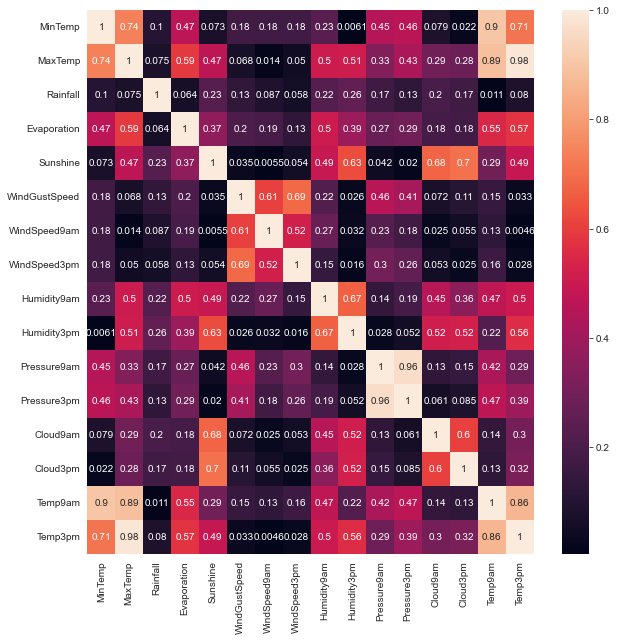

In \[20\]:

    for col in num_features:
        sns.boxplot(df[col])
        plt.title(col)
        plt.show()

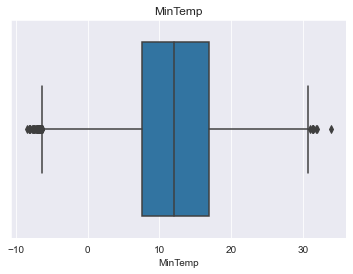

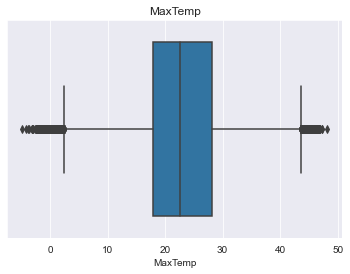

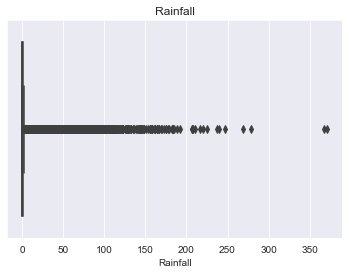

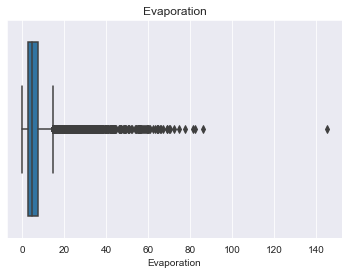

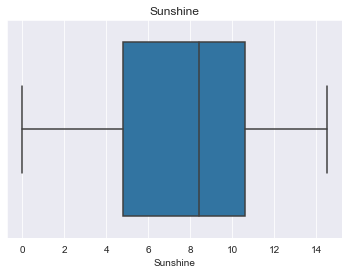

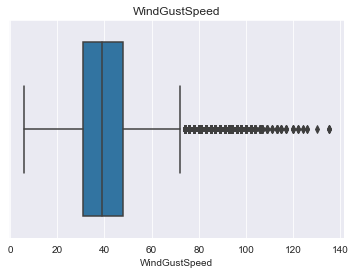

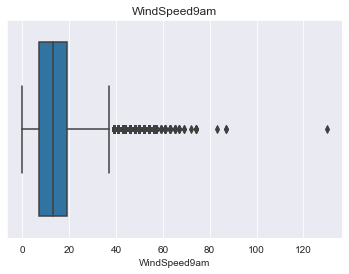

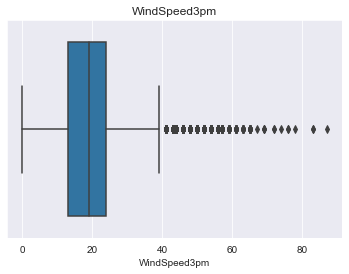

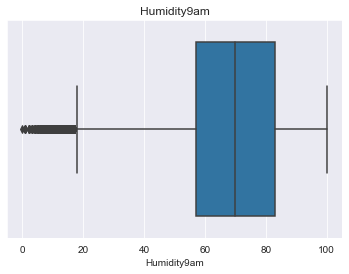

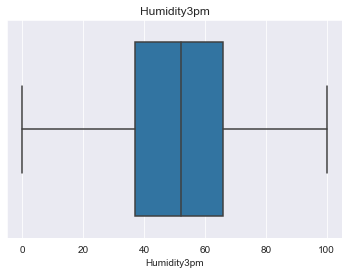

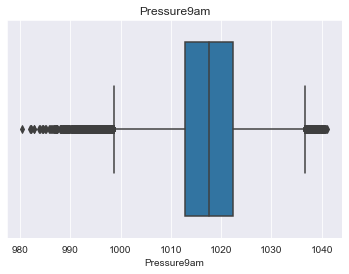

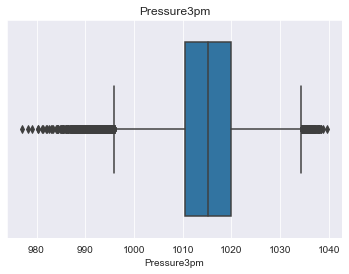

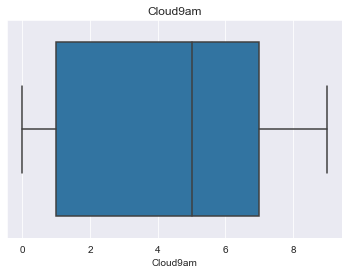

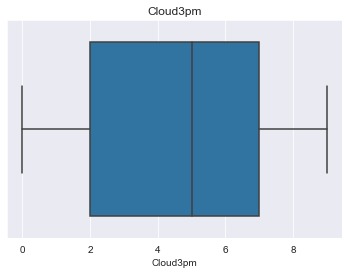

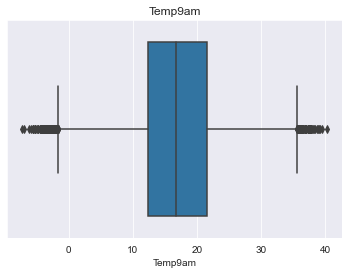

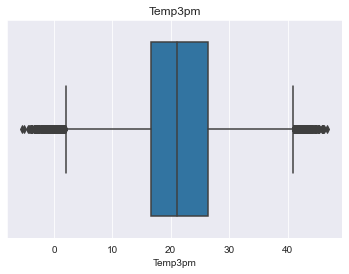

In \[21\]:

    df['RainTomorrow'].value_counts().plot.bar()
    plt.title('RainTomorrow')
    plt.show()

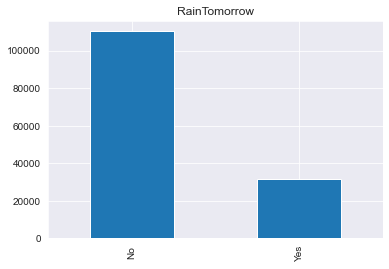

In \[22\]:

    positive_class=df[df['RainTomorrow']=='Yes']
    negative_class=df[df['RainTomorrow']=='No']
    for col in num_features:
        plt.figure(figsize=(5,5))
        positive_class[col].hist(bins=50,alpha=0.7)
        negative_class[col].hist(bins=50,alpha=0.7)
        plt.title(col)
        plt.legend(['pos','neg'],loc='best')
        plt.show()

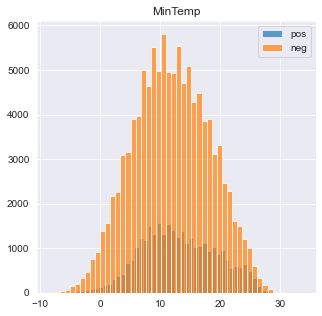

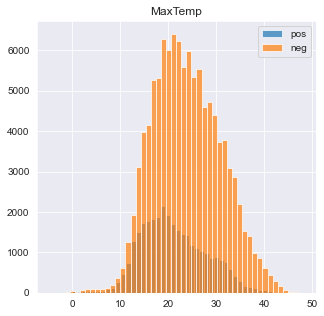

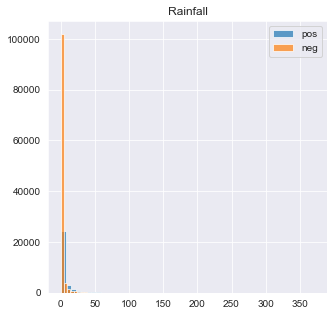

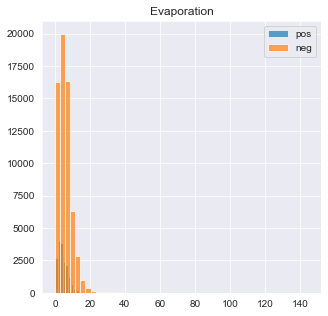

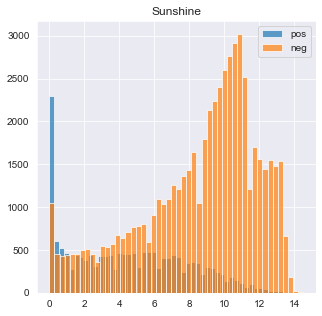

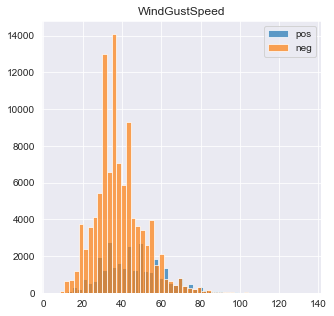

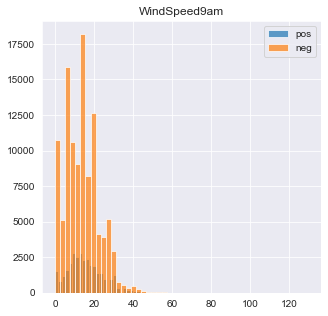

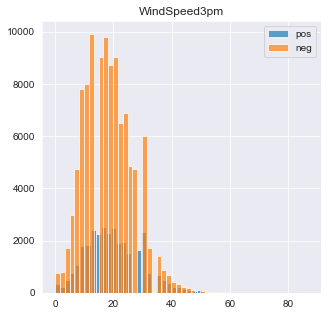

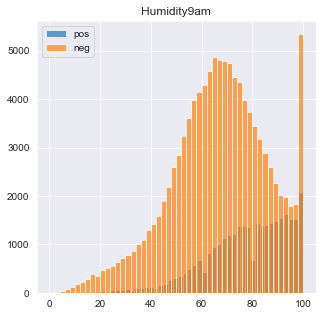

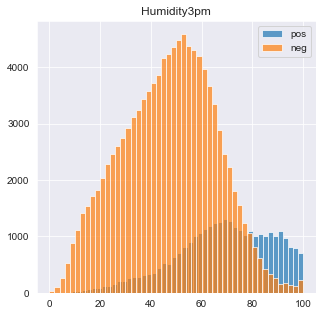

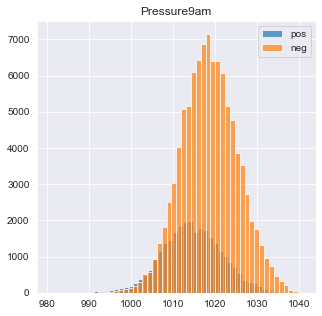

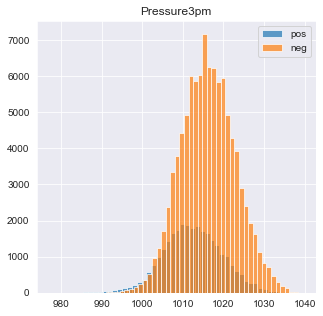

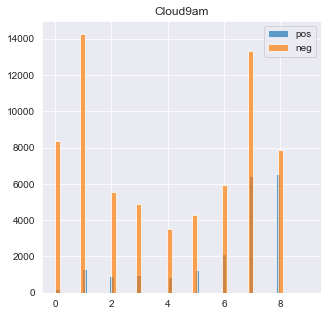

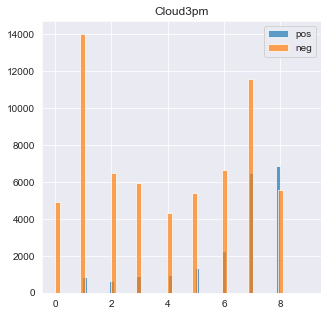

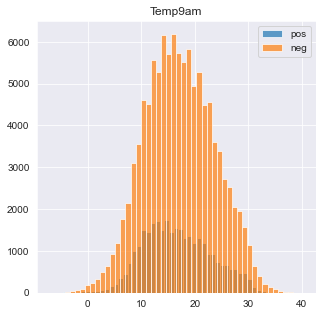

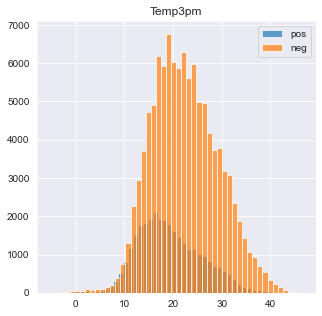

In \[23\]:

    def correlation (df,threshold):
        col_corr=set() # names of correlated columns
        corr_matrix=df.corr()
        for i in range(len(corr_matrix.columns)):
            for j in range(i):
                if abs(corr_matrix.iloc[i,j]) > threshold:
                    colname=corr_matrix.columns[i]
                    col_corr.add(colname)
        
        return col_corr

    print(correlation(df[num_features],0.8))

    {'Pressure3pm', 'Temp9am', 'Temp3pm'}

In \[24\]:

    df=df.drop(['Temp9am', 'Pressure3pm', 'Temp3pm'],axis=1)
    df.head()

Out\[24\]:

|     | Date       | Location | MinTemp | MaxTemp | Rainfall | Evaporation | Sunshine | WindGustDir | WindGustSpeed | WindDir9am | WindDir3pm | WindSpeed9am | WindSpeed3pm | Humidity9am | Humidity3pm | Pressure9am | Cloud9am | Cloud3pm | RainToday | RainTomorrow |
|-----|------------|----------|---------|---------|----------|-------------|----------|-------------|---------------|------------|------------|--------------|--------------|-------------|-------------|-------------|----------|----------|-----------|--------------|
| 0   | 2008-12-01 | Albury   | 13.4    | 22.9    | 0.6      | NaN         | NaN      | W           | 44.0          | W          | WNW        | 20.0         | 24.0         | 71.0        | 22.0        | 1007.7      | 8.0      | NaN      | No        | No           |
| 1   | 2008-12-02 | Albury   | 7.4     | 25.1    | 0.0      | NaN         | NaN      | WNW         | 44.0          | NNW        | WSW        | 4.0          | 22.0         | 44.0        | 25.0        | 1010.6      | NaN      | NaN      | No        | No           |
| 2   | 2008-12-03 | Albury   | 12.9    | 25.7    | 0.0      | NaN         | NaN      | WSW         | 46.0          | W          | WSW        | 19.0         | 26.0         | 38.0        | 30.0        | 1007.6      | NaN      | 2.0      | No        | No           |
| 3   | 2008-12-04 | Albury   | 9.2     | 28.0    | 0.0      | NaN         | NaN      | NE          | 24.0          | SE         | E          | 11.0         | 9.0          | 45.0        | 16.0        | 1017.6      | NaN      | NaN      | No        | No           |
| 4   | 2008-12-05 | Albury   | 17.5    | 32.3    | 1.0      | NaN         | NaN      | W           | 41.0          | ENE        | NW         | 7.0          | 20.0         | 82.0        | 33.0        | 1010.8      | 7.0      | 8.0      | No        | No           |

In \[25\]:

    for col in cat_features:
        print(col+":",len(df[col].unique()))

    Date: 3436
    Location: 49
    WindGustDir: 17
    WindDir9am: 17
    WindDir3pm: 17
    RainToday: 3
    RainTomorrow: 3

In \[26\]:

    df['Date']=pd.to_datetime(df['Date'])
    df['year']=df['Date'].dt.year
    df['month']=df['Date'].dt.month
    df['Days']=df['Date'].dt.day
    df=df.drop('Date',axis=1)
    df.head()

Out\[26\]:

|     | Location | MinTemp | MaxTemp | Rainfall | Evaporation | Sunshine | WindGustDir | WindGustSpeed | WindDir9am | WindDir3pm | ... | Humidity9am | Humidity3pm | Pressure9am | Cloud9am | Cloud3pm | RainToday | RainTomorrow | year | month | Days |
|-----|----------|---------|---------|----------|-------------|----------|-------------|---------------|------------|------------|-----|-------------|-------------|-------------|----------|----------|-----------|--------------|------|-------|------|
| 0   | Albury   | 13.4    | 22.9    | 0.6      | NaN         | NaN      | W           | 44.0          | W          | WNW        | ... | 71.0        | 22.0        | 1007.7      | 8.0      | NaN      | No        | No           | 2008 | 12    | 1    |
| 1   | Albury   | 7.4     | 25.1    | 0.0      | NaN         | NaN      | WNW         | 44.0          | NNW        | WSW        | ... | 44.0        | 25.0        | 1010.6      | NaN      | NaN      | No        | No           | 2008 | 12    | 2    |
| 2   | Albury   | 12.9    | 25.7    | 0.0      | NaN         | NaN      | WSW         | 46.0          | W          | WSW        | ... | 38.0        | 30.0        | 1007.6      | NaN      | 2.0      | No        | No           | 2008 | 12    | 3    |
| 3   | Albury   | 9.2     | 28.0    | 0.0      | NaN         | NaN      | NE          | 24.0          | SE         | E          | ... | 45.0        | 16.0        | 1017.6      | NaN      | NaN      | No        | No           | 2008 | 12    | 4    |
| 4   | Albury   | 17.5    | 32.3    | 1.0      | NaN         | NaN      | W           | 41.0          | ENE        | NW         | ... | 82.0        | 33.0        | 1010.8      | 7.0      | 8.0      | No        | No           | 2008 | 12    | 5    |

5 rows × 22 columns

In \[27\]:

    nan_features=[col for col in df.columns if df[col].isnull().any()]
    print("features contain nan_values:{}".format(nan_features))

    features contain nan_values:['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Cloud9am', 'Cloud3pm', 'RainToday', 'RainTomorrow']

In \[28\]:

    num_imputed=[col for col in nan_features if df[col].dtypes !='O']
    def imputation_numerical (num_imputed):
        from sklearn.impute import SimpleImputer
        imputer=SimpleImputer(strategy='mean')
        df[num_imputed]=imputer.fit_transform(df[num_imputed])
        return df[num_imputed]

    df[num_imputed]=imputation_numerical(num_imputed)
    print(df[num_imputed].isnull().sum())

    MinTemp          0
    MaxTemp          0
    Rainfall         0
    Evaporation      0
    Sunshine         0
    WindGustSpeed    0
    WindSpeed9am     0
    WindSpeed3pm     0
    Humidity9am      0
    Humidity3pm      0
    Pressure9am      0
    Cloud9am         0
    Cloud3pm         0
    dtype: int64

In \[29\]:

    cat_imputed=[col for col in nan_features if col not in num_imputed]
    def imputation_categorical(cat_imputed):
        for col in cat_imputed:
            df[col]=df[col].fillna(df[col].mode().iloc[0])
        return df[cat_imputed]

    df[cat_imputed]=imputation_categorical(cat_imputed)
    print(df[cat_imputed].isnull().sum())

    WindGustDir     0
    WindDir9am      0
    WindDir3pm      0
    RainToday       0
    RainTomorrow    0
    dtype: int64

In \[30\]:

    num_features=[col for col in df.columns if df[col].dtypes !='O']
    cat_features=[col for col in df.columns if col not in num_features]
    for col in cat_features:
        label_list=list(Data[col].unique())
        label_dict={i:v for v,i in enumerate(label_list,0)}
        df[col]=df[col].map(label_dict)

In \[31\]:

    df.head(20)

Out\[31\]:

|     | Location | MinTemp | MaxTemp | Rainfall  | Evaporation | Sunshine | WindGustDir | WindGustSpeed | WindDir9am | WindDir3pm | ... | Humidity9am | Humidity3pm | Pressure9am | Cloud9am | Cloud3pm | RainToday | RainTomorrow | year | month | Days |
|-----|----------|---------|---------|-----------|-------------|----------|-------------|---------------|------------|------------|-----|-------------|-------------|-------------|----------|----------|-----------|--------------|------|-------|------|
| 0   | 0        | 13.4    | 22.9    | 0.600000  | 5.468232    | 7.611178 | 0           | 44.00000      | 0          | 0          | ... | 71.0        | 22.0        | 1007.7      | 8.000000 | 4.50993  | 0         | 0            | 2008 | 12    | 1    |
| 1   | 0        | 7.4     | 25.1    | 0.000000  | 5.468232    | 7.611178 | 1           | 44.00000      | 1          | 1          | ... | 44.0        | 25.0        | 1010.6      | 4.447461 | 4.50993  | 0         | 0            | 2008 | 12    | 2    |
| 2   | 0        | 12.9    | 25.7    | 0.000000  | 5.468232    | 7.611178 | 2           | 46.00000      | 0          | 1          | ... | 38.0        | 30.0        | 1007.6      | 4.447461 | 2.00000  | 0         | 0            | 2008 | 12    | 3    |
| 3   | 0        | 9.2     | 28.0    | 0.000000  | 5.468232    | 7.611178 | 3           | 24.00000      | 2          | 2          | ... | 45.0        | 16.0        | 1017.6      | 4.447461 | 4.50993  | 0         | 0            | 2008 | 12    | 4    |
| 4   | 0        | 17.5    | 32.3    | 1.000000  | 5.468232    | 7.611178 | 0           | 41.00000      | 3          | 3          | ... | 82.0        | 33.0        | 1010.8      | 7.000000 | 8.00000  | 0         | 0            | 2008 | 12    | 5    |
| 5   | 0        | 14.6    | 29.7    | 0.200000  | 5.468232    | 7.611178 | 1           | 56.00000      | 0          | 4          | ... | 55.0        | 23.0        | 1009.2      | 4.447461 | 4.50993  | 0         | 0            | 2008 | 12    | 6    |
| 6   | 0        | 14.3    | 25.0    | 0.000000  | 5.468232    | 7.611178 | 0           | 50.00000      | 4          | 4          | ... | 49.0        | 19.0        | 1009.6      | 1.000000 | 4.50993  | 0         | 0            | 2008 | 12    | 7    |
| 7   | 0        | 7.7     | 26.7    | 0.000000  | 5.468232    | 7.611178 | 0           | 35.00000      | 5          | 4          | ... | 48.0        | 19.0        | 1013.4      | 4.447461 | 4.50993  | 0         | 0            | 2008 | 12    | 8    |
| 8   | 0        | 9.7     | 31.9    | 0.000000  | 5.468232    | 7.611178 | 4           | 80.00000      | 2          | 3          | ... | 42.0        | 9.0         | 1008.9      | 4.447461 | 4.50993  | 0         | 1            | 2008 | 12    | 9    |
| 9   | 0        | 13.1    | 30.1    | 1.400000  | 5.468232    | 7.611178 | 0           | 28.00000      | 6          | 5          | ... | 58.0        | 27.0        | 1007.0      | 4.447461 | 4.50993  | 1         | 0            | 2008 | 12    | 10   |
| 10  | 0        | 13.4    | 30.4    | 0.000000  | 5.468232    | 7.611178 | 5           | 30.00000      | 5          | 6          | ... | 48.0        | 22.0        | 1011.8      | 4.447461 | 4.50993  | 0         | 1            | 2008 | 12    | 11   |
| 11  | 0        | 15.9    | 21.7    | 2.200000  | 5.468232    | 7.611178 | 6           | 31.00000      | 7          | 7          | ... | 89.0        | 91.0        | 1010.5      | 8.000000 | 8.00000  | 1         | 1            | 2008 | 12    | 12   |
| 12  | 0        | 15.9    | 18.6    | 15.600000 | 5.468232    | 7.611178 | 0           | 61.00000      | 1          | 8          | ... | 76.0        | 93.0        | 994.3       | 8.000000 | 8.00000  | 1         | 1            | 2008 | 12    | 13   |
| 13  | 0        | 12.6    | 21.0    | 3.600000  | 5.468232    | 7.611178 | 7           | 44.00000      | 0          | 9          | ... | 65.0        | 43.0        | 1001.2      | 4.447461 | 7.00000  | 1         | 0            | 2008 | 12    | 14   |
| 14  | 0        | 8.4     | 24.6    | 0.000000  | 5.468232    | 7.611178 | 0           | 40.03523      | 6          | 0          | ... | 57.0        | 32.0        | 1009.7      | 4.447461 | 4.50993  | 0         | 0            | 2008 | 12    | 15   |
| 15  | 0        | 9.8     | 27.7    | 2.360918  | 5.468232    | 7.611178 | 1           | 50.00000      | 10         | 0          | ... | 50.0        | 28.0        | 1013.4      | 0.000000 | 4.50993  | 0         | 0            | 2008 | 12    | 16   |
| 16  | 0        | 14.1    | 20.9    | 0.000000  | 5.468232    | 7.611178 | 9           | 22.00000      | 9          | 2          | ... | 69.0        | 82.0        | 1012.2      | 8.000000 | 1.00000  | 0         | 1            | 2008 | 12    | 17   |
| 17  | 0        | 13.5    | 22.9    | 16.800000 | 5.468232    | 7.611178 | 0           | 63.00000      | 10         | 0          | ... | 80.0        | 65.0        | 1005.8      | 8.000000 | 1.00000  | 1         | 1            | 2008 | 12    | 18   |
| 18  | 0        | 11.2    | 22.5    | 10.600000 | 5.468232    | 7.611178 | 10          | 43.00000      | 11         | 10         | ... | 47.0        | 32.0        | 1009.4      | 4.447461 | 2.00000  | 1         | 0            | 2008 | 12    | 19   |
| 19  | 0        | 9.8     | 25.6    | 0.000000  | 5.468232    | 7.611178 | 10          | 26.00000      | 2          | 8          | ... | 45.0        | 26.0        | 1019.2      | 4.447461 | 4.50993  | 0         | 0            | 2008 | 12    | 20   |

20 rows × 22 columns

In \[32\]:

    X=df.drop('RainTomorrow',axis=1)
    y=df['RainTomorrow']

In \[33\]:

    from sklearn.model_selection import train_test_split
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In \[40\]:

    from sklearn.naive_bayes import GaussianNB
    model=GaussianNB()
    model.fit(X_train,y_train)

Out\[40\]:

    GaussianNB()

In \[41\]:

    y_pred=model.predict(X_test)

In \[43\]:

    from sklearn.metrics import accuracy_score
    score=accuracy_score(y_test,y_pred)
    print('accuracy_score:%0.2f'%score)

    accuracy_score:0.81

In \[37\]:

    from sklearn.metrics import confusion_matrix
    cm=confusion_matrix(y_test,y_pred)
    print(cm)

    [[19768  2958]
     [ 2713  3653]]

In \[38\]:

    from sklearn.metrics import classification_report
    cr=classification_report(y_test,y_pred)
    print(cr)

                  precision    recall  f1-score   support

               0       0.88      0.87      0.87     22726
               1       0.55      0.57      0.56      6366

        accuracy                           0.81     29092
       macro avg       0.72      0.72      0.72     29092
    weighted avg       0.81      0.81      0.81     29092

In \[39\]:

     

    ---------------------------------------------------------------------------
    AttributeError                            Traceback (most recent call last)
    ~\AppData\Local\Temp/ipykernel_14320/4187054289.py in <module>
          5     plt.xlabel("Feature importance")
          6     plt.ylabel("Feature")
    ----> 7 plot_feature_importances_cancer(model)

    ~\AppData\Local\Temp/ipykernel_14320/4187054289.py in plot_feature_importances_cancer(model)
          1 def plot_feature_importances_cancer(model):
          2     n_features = X_train.shape[1]
    ----> 3     plt.barh(range(n_features), model.feature_importances_, align='center')
          4     plt.yticks(np.arange(n_features), X_train.columns)
          5     plt.xlabel("Feature importance")

    AttributeError: 'GaussianNB' object has no attribute 'feature_importances_'

In \[ \]: